# Match Winner Prediction
In tennis, there are many factors that can determine how well a player is playing that day. For example, a player can be playing well if he or she is hitting a lot of winners and not making many errors. One of the most important parts of player's game is the serve. The serve in tennis is the only shot which a player completely controls. Every shot after the serve is based on a reaction of the opponent's previous shot. 


### Objective:
For my final project, I will be taking data from the Women's Tennis Association (WTA) matches from 2014 to predict winning and losing. The data will mainly include serving data. The data was found on www.kaggle.com

### Data Attributes:
The data has 49 different attributes. Many of the attributes are not valuable to determining the winner or loser of a match. For example, there is unnecessary tournament data, such as tournament id, tournament name, draw size, and others. Also, there is unnecesary player information. For each player, the age, country, seed, player id, and other information is given that does not affect the performance of the player. 

For serving, we will use the following metrics for each player:
* Aces
* Double Faults
* Number of Services points
* Number of First Serves In
* Number of First Serves Won (Removed)
* Number of Second Serves Won (Removed)
* Break Points Saved
* Break Points Faced



In [1]:
# %load /home/ubuntu/Notebooks/wsetup.py
## Packages
import itertools as it
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt

## Special Items
idx = pd.IndexSlice
digits = 3
pd.options.display.chop_threshold = 10**-(digits+1)
#pd.options.display.precision = 3
pd.options.display.float_format = lambda x: '{0:.{1}f}'.format(x,digits)
pd.options.display.show_dimensions = True
        
## Matplotlib Options
%matplotlib inline
#%matplotlib notebook
plt.style.use("classic")
plt.style.use("seaborn-darkgrid")
#plt.style.use("bmh")
plt.rc("figure", figsize=(5,3))

## Functions
def display(X):
    if isinstance(X,np.ndarray) or isinstance(X,pd.Series):
        ipd.display(pd.DataFrame(X))
    else:
        ipd.display(X)
        
def Lnorm(v,p=2):
    if p%2 == 0:
        return (v**P).sum()**(1/p)
    else:
        return (v.abs()**p).sum()**(1/p)

def Ldist(v,w,p=2):
    return Lnorm(v-w,p)

In [2]:
#Uploading, displaying, and partial cleaning of the data
matches = pd.read_csv("wta_matches_2014.csv")
del matches["tourney_date"], matches["tourney_id"], matches["tourney_level"], matches["tourney_name"], matches["surface"], matches["draw_size"], matches["winner_hand"]
del matches["match_num"], matches["winner_id"], matches["winner_entry"], matches["winner_age"], matches["winner_ioc"], matches["winner_name"], matches["loser_hand"]
del matches["winner_rank_points"], matches["winner_seed"], matches["loser_age"], matches["loser_entry"], matches["loser_id"], matches["loser_ioc"], matches["loser_name"]
del matches["loser_rank_points"], matches["loser_seed"], matches["score"], matches["best_of"], matches["round"], matches["minutes"], matches["w_SvGms"], matches["l_SvGms"]
del matches["winner_ht"], matches["loser_ht"], matches["winner_rank"], matches["loser_rank"]

#Adding the removal of points won on 1st and 2nd serve
del matches["w_1stWon"], matches["w_2ndWon"], matches["l_1stWon"], matches["l_2ndWon"]

In [3]:
matches = matches.ix[:2227,:]
matches_1 = matches.ix[:1113,:]
matches_2 = matches.ix[1114:,]
matches_1 = matches_1.rename(index=str, columns={"w_ace":"P1_ace", "w_df":"P1_df","w_svpt":"P1_svpt","w_1stIn":"P1_1stIn","w_bpSaved":"P1_bpSaved","w_bpFaced":"P1_bpFaced","l_ace":"P2_ace","l_df":"P2_df", "l_svpt":"P2_svpt","l_1stIn":"P2_1stIn", "l_bpSaved":"P2_bpSaved","l_bpFaced":"P2_bpFaced"})
matches_2 = matches_2.rename(index=str, columns={"w_ace":"P2_ace", "w_df":"P2_df","w_svpt":"P2_svpt","w_1stIn":"P2_1stIn","w_bpSaved":"P2_bpSaved","w_bpFaced":"P2_bpFaced","l_ace":"P1_ace","l_df":"P1_df", "l_svpt":"P1_svpt","l_1stIn":"P1_1stIn", "l_bpSaved":"P1_bpSaved","l_bpFaced":"P1_bpFaced"})
matches = [matches_1,matches_2]
matches = pd.concat(matches)

In [4]:
#Making data to represenent the percentage of points won instead of just points won and lost on serve
# Player 1
matches["P1_1stPercent"] = matches["P1_1stIn"]/matches["P1_svpt"]
#matches["P1_1stPerWon"] = matches["P1_1stWon"]/matches["P1_1stIn"] Removed 
matches["P1_2ndPercent"] = (matches["P1_svpt"]-matches["P1_1stIn"]-matches["P1_df"])/(matches["P1_svpt"]-matches["P1_1stIn"])
#matches["P1_2ndPerWon"] = matches["P1_2ndWon"]/(matches["P1_svpt"]-matches["P1_1stIn"]-matches["P1_df"]) Removed

#Player 2
matches["P2_1stPercent"] = matches["P2_1stIn"]/matches["P2_svpt"]
#matches["P2_1stPerWon"] = matches["P2_1stWon"]/matches["P2_1stIn"] REmoved
matches["P2_2ndPercent"] = (matches["P2_svpt"]-matches["P2_1stIn"]-matches["P2_df"])/(matches["P2_svpt"]-matches["P2_1stIn"])
#matches["P2_2ndPerWon"] = matches["P2_2ndWon"]/(matches["P2_svpt"]-matches["P2_1stIn"]-matches["P2_df"]) Removed


#Attaching Winner Column
Winner_1 = ["P1" for i in range(0,1113)]
Winner_2 = ["P2" for i in range(1114,2229)]
Winner = Winner_1 + Winner_2
matches["Winner"] = Winner
display(matches)

P1_1stIn  P1_ace  P1_bpFaced  P1_bpSaved  P1_df  P1_svpt  P2_1stIn  \
0       20.000   6.000       0.000       0.000  2.000   34.000    28.000   
1       48.000   7.000       7.000       3.000  4.000   74.000    48.000   
2       30.000   5.000       2.000       2.000  0.000   50.000    32.000   
3       55.000   6.000       7.000       3.000  2.000   81.000    67.000   
4       32.000   5.000       3.000       3.000  0.000   52.000    30.000   
5       26.000   0.000       2.000       2.000  0.000   39.000    19.000   
6       41.000   3.000      11.000       5.000  4.000   68.000    40.000   
7       42.000   0.000      10.000       7.000  2.000   62.000    40.000   
8       29.000   0.000       1.000       1.000  0.000   44.000    41.000   
9       21.000   7.000       0.000       0.000  2.000   37.000    25.000   
10      51.000   7.000       7.000       5.000  9.000   88.000    39.000   
11      29.000   4.000       5.000       3.000  2.000   58.000    43.000   
12      34.000   3.000       1.000       1.000  0.000   45.000    26.000   
13      46.000   5.000      13.000       5.000  5.000   86.000    67.000   
14      25.000   9.000       5.000       5.000  4.000   46.000    23.000   
15      50.000   3.000       7.000       5.000  4.000   85.000    54.000   
16      69.000   1.000      14.000       9.000  4.000  109.000    50.000   
17      45.000   1.000       7.000       4.000  0.000   55.000    44.000   
18      38.000   7.000       7.000       7.000  6.000   73.000    23.000   
19      57.000   6.000      11.000       7.000  5.000   88.000    39.000   
20      53.000   3.000       6.000       2.000  4.000   91.000    46.000   
21      54.000   6.000      15.000      13.000  8.000   93.000    43.000   
22      25.000   4.000       0.000       0.000  3.000   39.000    32.000   
23      19.000   2.000       3.000       2.000  3.000   48.000    34.000   
24      40.000   8.000       8.000       7.000  5.000   66.000    34.000   
25      55.000   2.000       6.000       4.000  3.000   80.000    49.000   
26      36.000   4.000      12.000       8.000  6.000   75.000    58.000   
27      32.000   6.000       8.000       7.000  6.000   53.000    22.000   
28      47.000   6.000       8.000       6.000  2.000   76.000    42.000   
29      66.000   1.000      10.000       4.000  6.000   89.000    69.000   
...        ...     ...         ...         ...    ...      ...       ...   
2198    52.000   0.000       7.000       4.000  2.000   78.000    36.000   
2199    26.000   1.000       9.000       6.000  2.000   47.000    35.000   
2200    18.000   1.000       1.000       0.000  2.000   26.000    13.000   
2201    33.000   0.000       7.000       2.000  6.000   48.000    31.000   
2202    14.000   0.000       5.000       3.000  1.000   19.000     5.000   
2203    31.000   0.000       9.000       2.000  3.000   45.000    30.000   
2204    17.000   0.000       3.000       0.000  0.000   24.000    14.000   
2205    13.000   1.000       3.000       1.000  4.000   28.000    17.000   
2206    46.000   0.000      11.000       6.000  7.000   71.000    50.000   
2207    22.000   1.000       9.000       5.000  5.000   39.000    26.000   
2208    48.000   1.000       7.000       3.000  8.000   81.000    45.000   
2209    35.000   5.000       9.000       6.000  4.000   69.000    38.000   
2210    40.000   1.000       8.000       4.000  5.000   76.000    45.000   
2211    78.000   4.000      17.000      10.000  8.000  127.000    57.000   
2212    35.000   1.000       4.000       0.000  3.000   61.000    46.000   
2213    26.000   0.000       7.000       2.000  1.000   37.000    21.000   
2214    13.000   0.000       7.000       3.000  2.000   28.000    13.000   
2215    67.000   0.000      13.000       8.000  2.000  112.000    71.000   
2216    58.000   5.000      14.000       9.000  3.000   90.000    31.000   
2217    42.000   0.000       2.000       0.000  3.000   59.000    29.000   
2218    10.000   1.000       1.000       0.000  0.000 

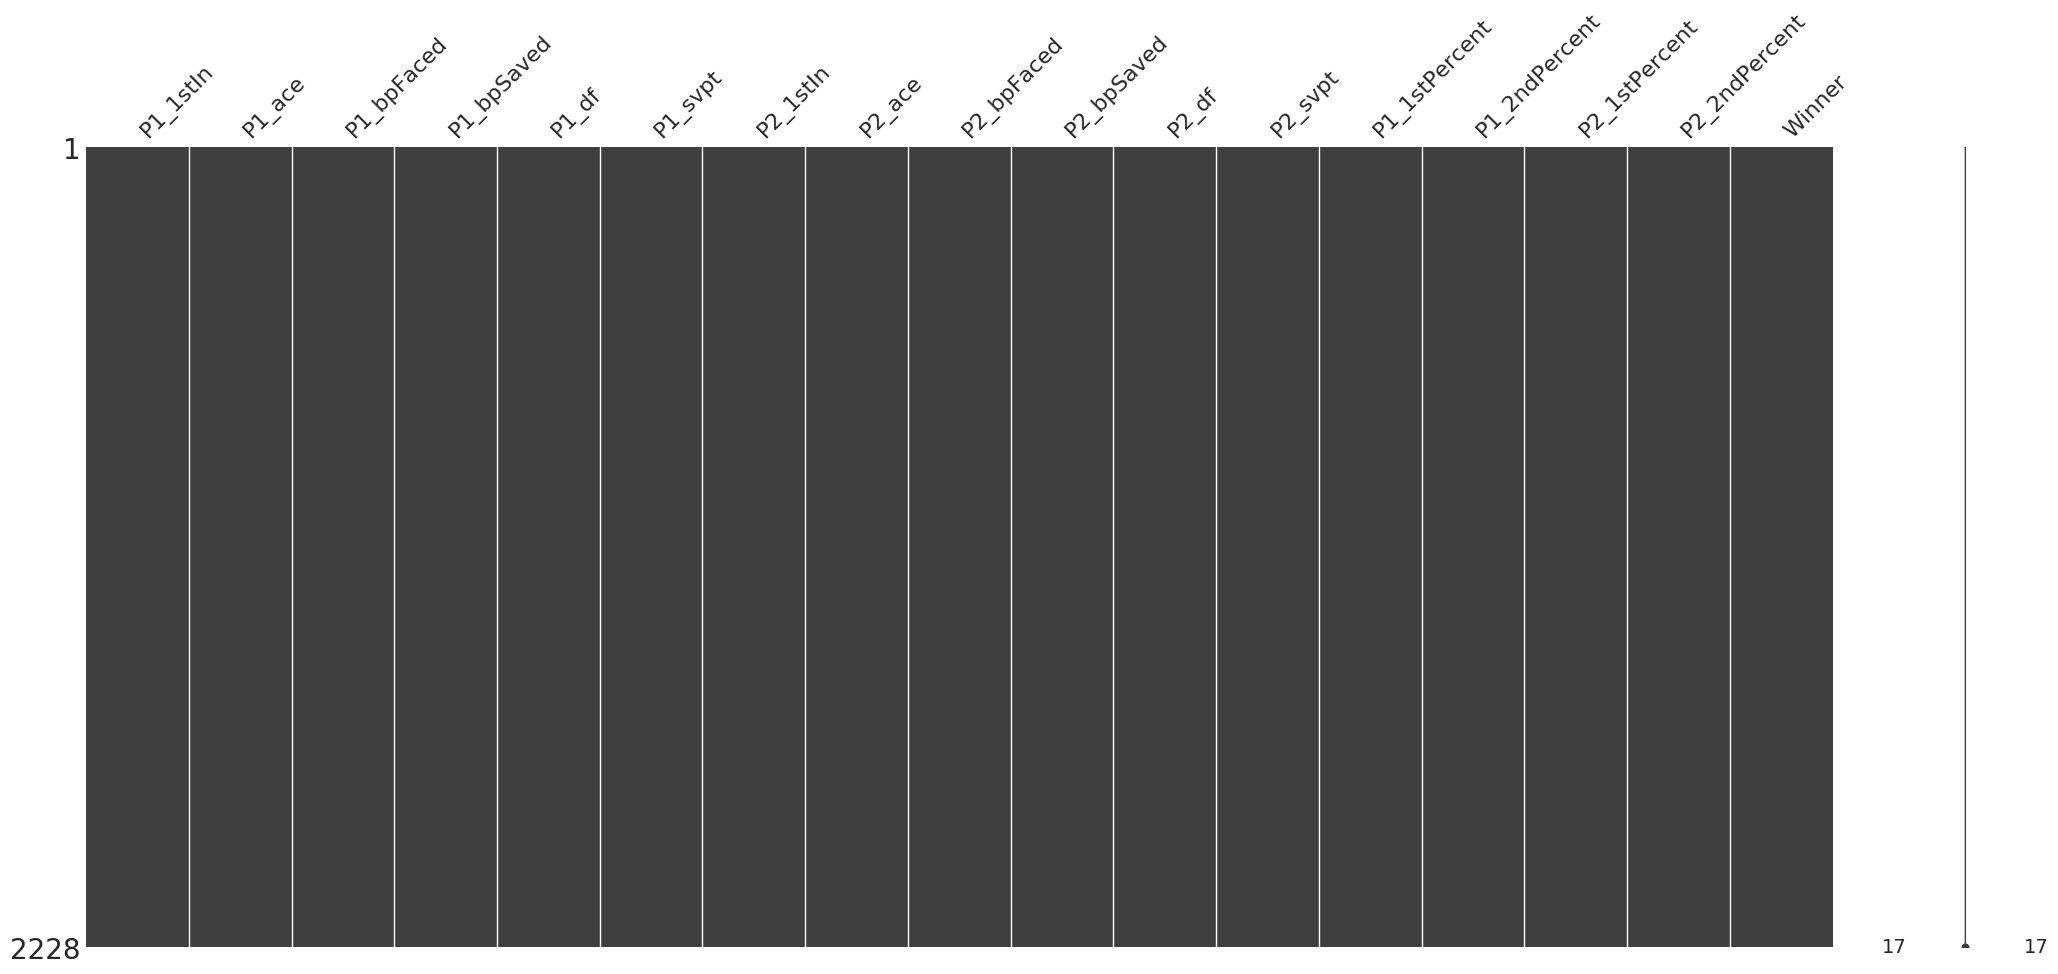

In [5]:
import missingno as msno
msno.matrix(matches)

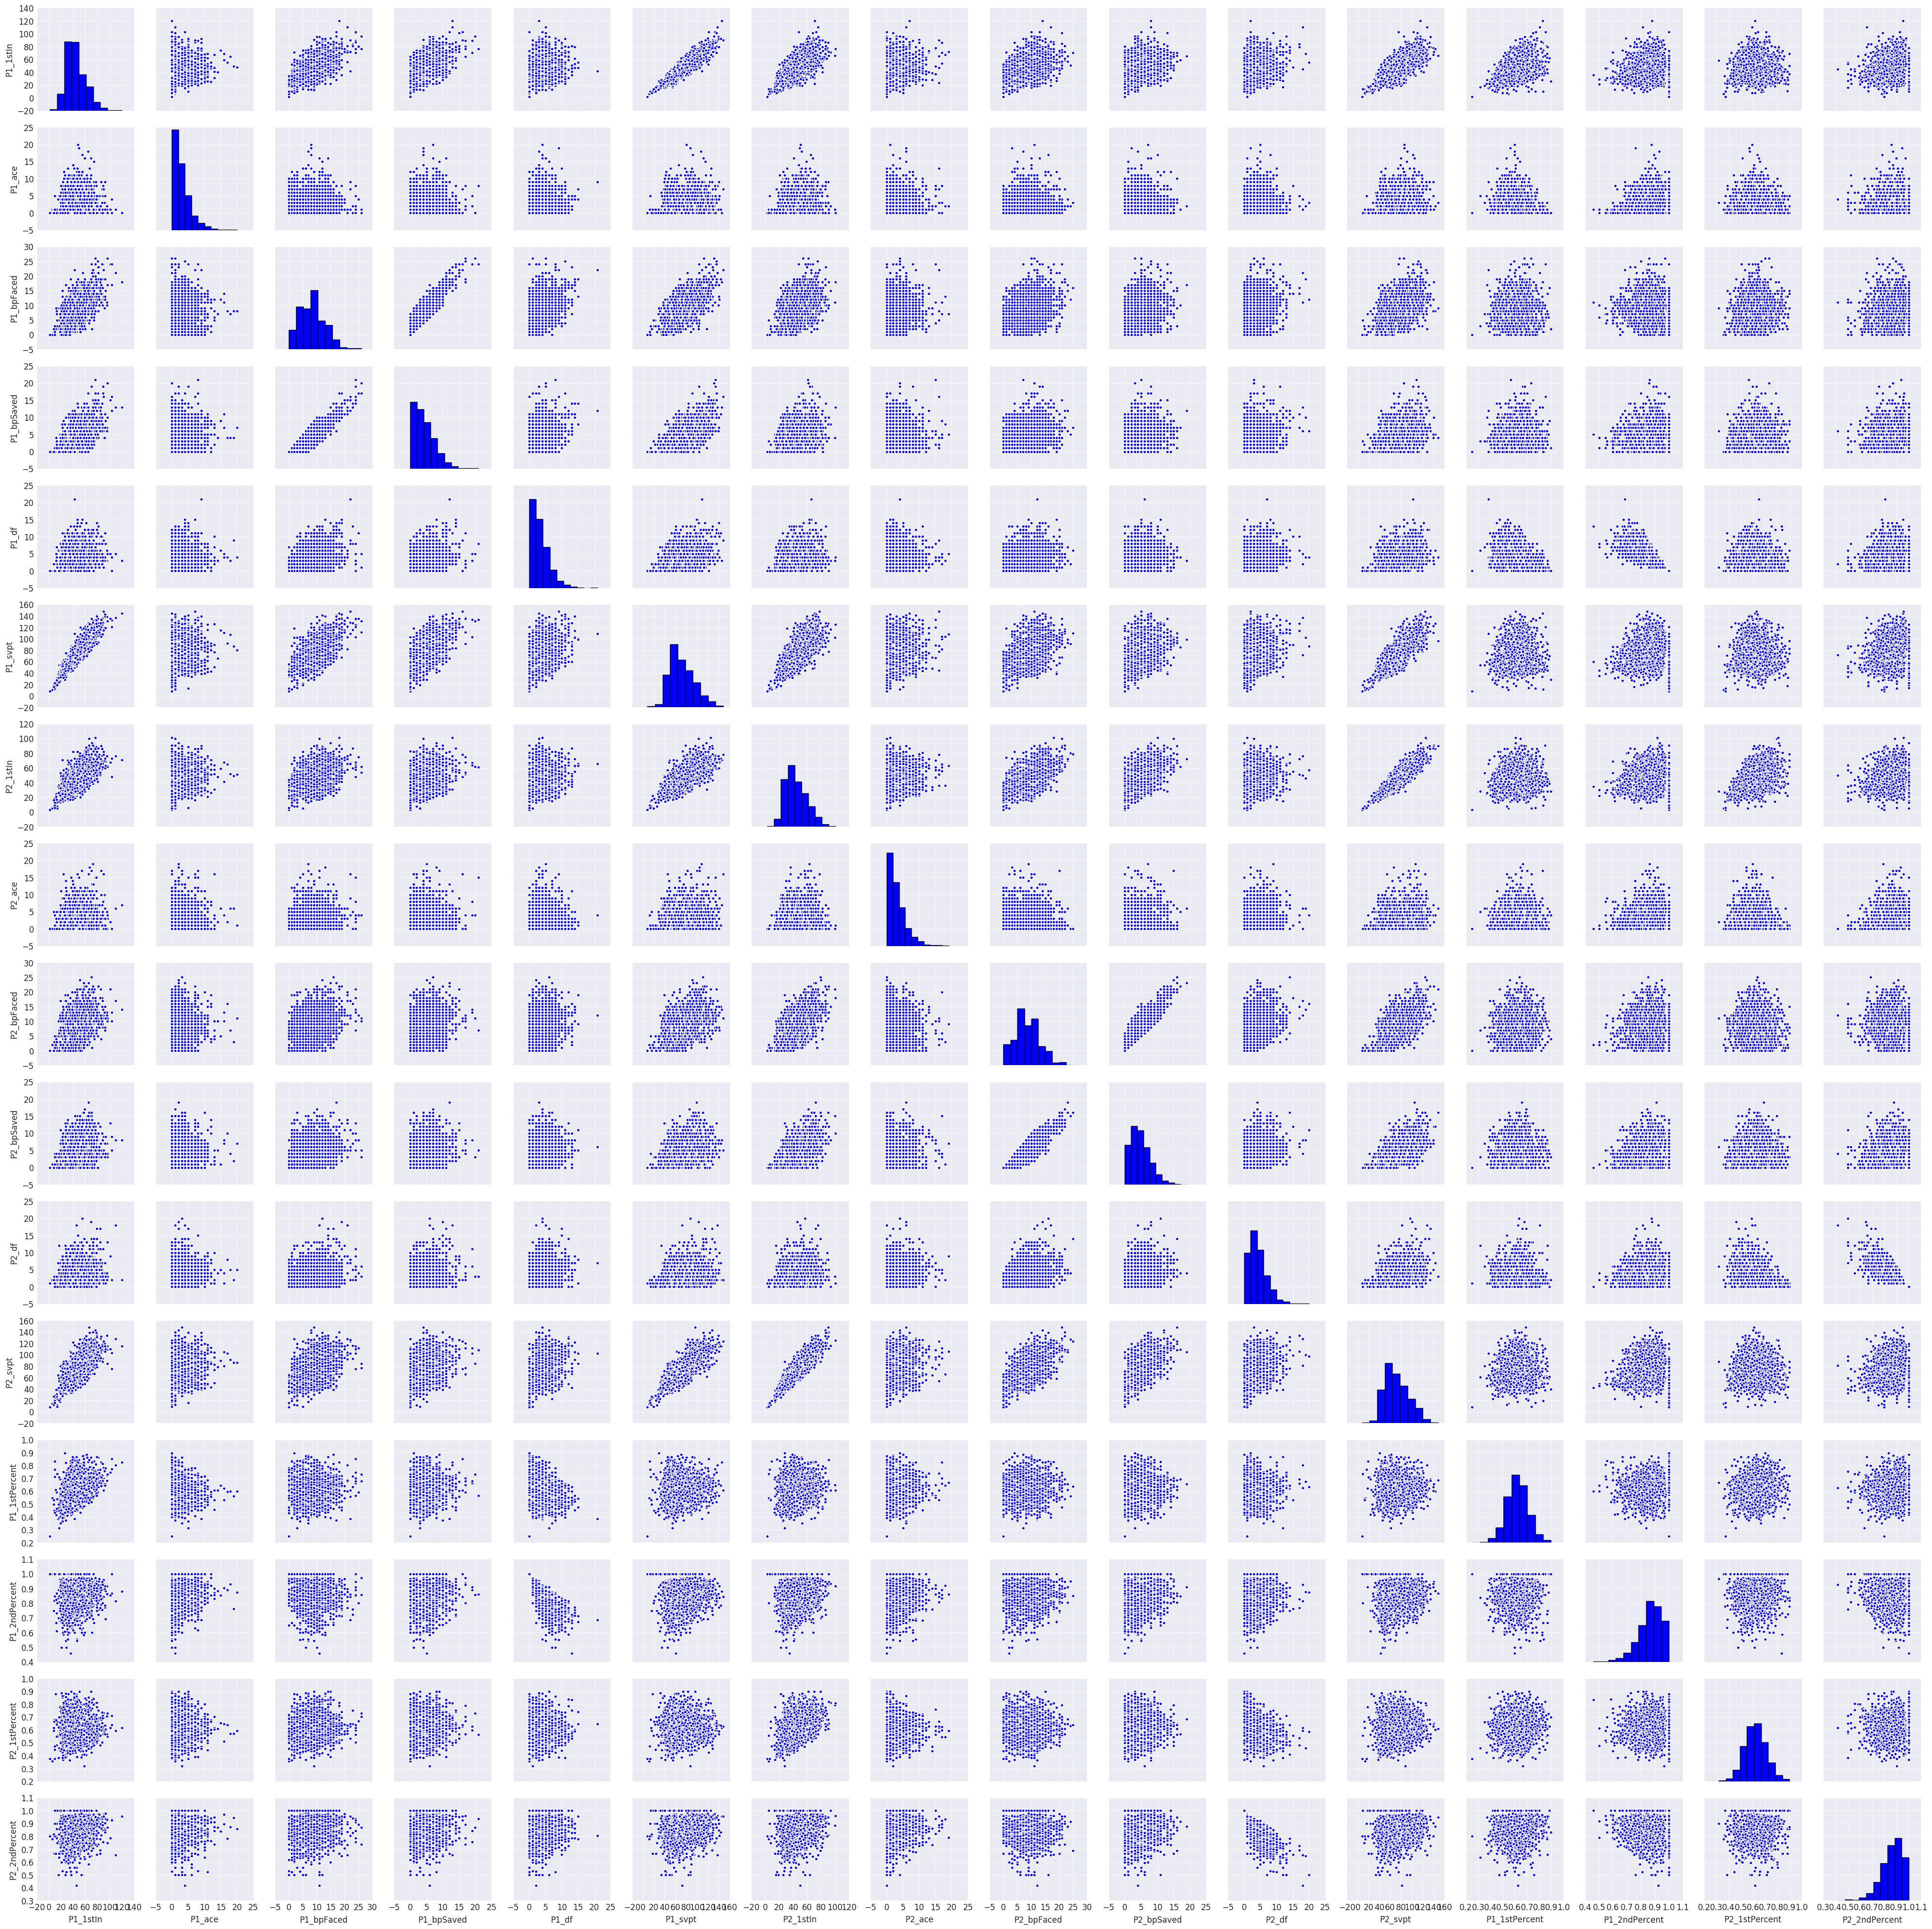

In [6]:
sns.pairplot(matches);

# Principal Components Anaylsis

In [7]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

match_data = matches.ix[:,:16].values
scaled_matches = StandardScaler().fit_transform(match_data)
PCA = sklearnPCA(n_components=16)
PCA.fit(scaled_matches)
print("Explained Variance:\n%s\n" %np.cumsum(PCA.explained_variance_ratio_))
new_PCA = sklearnPCA(n_components=9)
new_PCA.fit(scaled_matches)
PCA_matches = pd.DataFrame(new_PCA.transform(scaled_matches))

Explained Variance:
[ 0.33137815  0.46515396  0.5876571   0.68050338  0.75766967  0.82719452
  0.88838911  0.93583135  0.96988203  0.98119328  0.98649369  0.99143822
  0.9956932   0.99920956  0.99963717  1.        ]



## PCA Comments

When I initially ran this project. I decided to keep the first 11 prinicpal components. However, now with fewer attributes, I have notices that the first 9 components will still keep 95% of the variance like I had initially wanted when I first attempted principal components analysis.


## SVM

I started with support vector machines. I created a pipeline model that ran randomized PCA, along with SVM. While doing my grid search, I was testing extreme values for gamma in lower bound. Every time I was getting the lowest bound. After further research I decided that the original gamma should be applied because nitpicking with the smallest value of gamma would be extreme for this case.

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale

PCA = sklearnPCA(n_components=9, svd_solver='randomized', random_state=15)
svm = SVC(kernel='linear')
model = make_pipeline(PCA, svm)
X = scale(matches.ix[:,:16])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, matches["Winner"], random_state=15)

In [35]:
param_grid = {'svc__C': [1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv = 10, n_jobs = -1)
grid.fit(Xtrain, Ytrain)
print(grid.best_params_)

param_grid2 = {'svc__gamma': [0.000000000000000000001, 0.0001, 0.001, 0.005]}
grid2 = GridSearchCV(model, param_grid2, cv = 10, n_jobs = -1)
grid2.fit(Xtrain, Ytrain)
print(grid2.best_params_)

{'svc__C': 5, 'svc__gamma': 0.0001}
{'svc__gamma': 1e-21}


In [36]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

0.73967684021543989

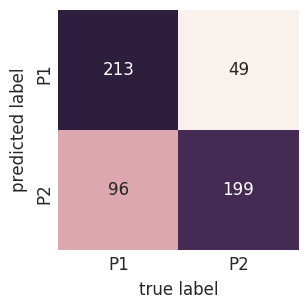

In [37]:
svm_mat = confusion_matrix(yfit,Ytest)

sns.heatmap(svm_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=("P1","P2"),
            yticklabels=("P1","P2"))
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracy_score(yfit, Ytest)

In [39]:
validation = cross_val_score(model, matches.ix[:,:16],matches["Winner"], cv = 10)
print(np.mean(validation))

0.804796929377


### Random Forests

For random forests, I decided to apply 2 different versions. I wanted to compare the whole data to the PCA data that I created using 9 components. From original comparisons with percents won, the whole data only differed by five percent, when cross-validated. However, the PCA data reduced accuracy by 17 percent on average. I am not surprised that the accuracies went down. I am surprised that the whole data did decrease less once percent won and points won was removed from the data.

0.88150807899461403

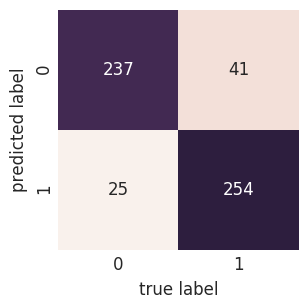

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=1000, random_state=15)
RF_model.fit(Xtrain,Ytrain)
ypred = RF_model.predict(Xtest)

mat = confusion_matrix(Ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracy_score(ypred, Ytest)

0.74506283662477557

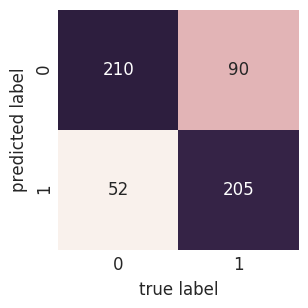

In [14]:
X2train, X2test, Y2train, Y2test = train_test_split(PCA_matches, matches["Winner"], random_state = 15)
RF_model.fit(X2train, Y2train)
y_pred = RF_model.predict(X2test)

pca_mat = confusion_matrix(Y2test, y_pred)
sns.heatmap(pca_mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracy_score(y_pred, Y2test)

In [15]:
forests_val = cross_val_score(RF_model, matches.ix[:,:16],matches["Winner"], cv = 10)
print(np.mean(forests_val))

forests_PCA_val = cross_val_score(RF_model, PCA_matches, matches["Winner"], cv = 10)
print(np.mean(forests_PCA_val))

0.860419209648
0.741462596886


## Clustering

Looking at the outcomes for this data, it is evident that clustering is not a valid approach for predicting match winners. I do find it intersting that the clustering seemed to perform better once extra data had been removed. The performance increase is not substantial enough for the models to be considered.

### K-Means

In [16]:
from sklearn.cluster import KMeans
X = matches.ix[:,0:16]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

[[ 59.44619105   3.19347037  11.10882709   6.3216445    4.72793229
   94.76662636  58.81499395   3.53204353  10.98428053   6.14631197
    4.7496977   94.19830713   0.62721375   0.86729105   0.62511077
    0.86706398]
 [ 35.31477516   2.17701642   6.7159172    3.53461813   2.96216988
   57.28194147  35.44610992   2.39329051   6.77658815   3.56031406
    3.09207709  57.6302641    0.61644041   0.86794061   0.61515677
    0.86223147]]


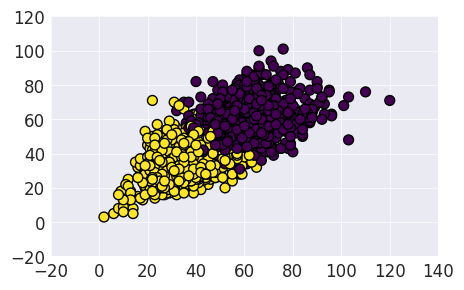

In [17]:
plt.scatter(matches["P1_1stIn"], matches["P2_1stIn"], c=y_kmeans, s=50, cmap='viridis');

centers = kmeans.cluster_centers_
print(centers)

In [18]:
Results_1 = [0 for i in range(0,1113)]
Results_2 = [1 for i in range(1114,2229)]
Results = Results_1 + Results_2

accuracy_score(y_kmeans,Results)

0.50628366247755829

### Gaussian Mixtures

In [19]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 2).fit(X)
labels = gmm.predict(X)

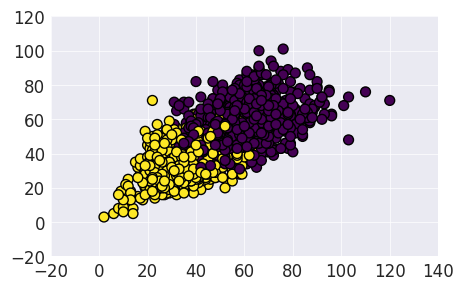

In [20]:
plt.scatter(matches["P1_1stIn"], matches["P2_1stIn"], c=labels, s=50, cmap='viridis');

In [21]:
accuracy_score(labels, Results)

0.49910233393177739

### Naive Bayes

I have now looked at the histograms for the data and have realized that the best method would be the multinomial Niave Bayes. There are some points of data that are normally distributed. However, most are skewed. You can observe the data on the pairplot in the section before the Pricipal Components Analysis. For the Naive Bayes Section, I ran Guassian with all the data and the PCA data to compare. I also ran the multinomial Naive Bayes test. From the conclusion we can see that Multinomial performs the best of these three. This would make the most sense since the data needed to be discretized, which is done by the multinomial approach.

Note: I also think that I realized the issue with Guassian NB with regular data and PCA data. I believe that it was  a random model that worked better with PCA than the regular data. With cross validation, PCA data has a slightly worse accuracy than the full data.

0.741472172352


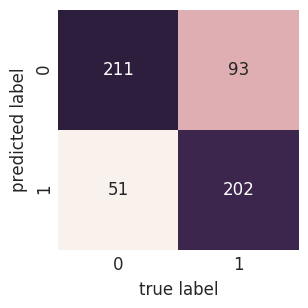

In [22]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(Xtrain,Ytrain)
yguess = GNB_model.predict(Xtest)

mat = confusion_matrix(Ytest, yguess)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

NB_accuracy = accuracy_score(yguess, Ytest)
print(NB_accuracy)

0.7342908438061041

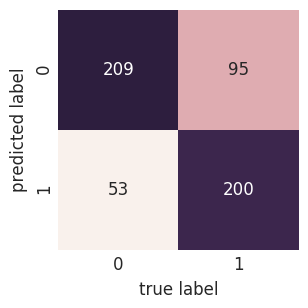

In [23]:
GNB_model.fit(X2train, Y2train)
y2_guess = GNB_model.predict(X2test)
pca_matr2 = confusion_matrix(Y2test, y2_guess)
sns.heatmap(pca_matr2.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');
accuracy_score(Y2test, y2_guess)

0.76122082585278272

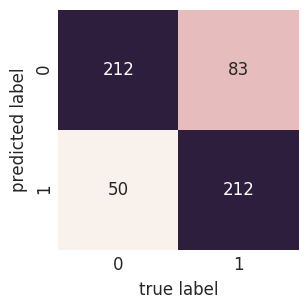

In [26]:
from sklearn.naive_bayes import MultinomialNB
Xtrain, Xtest, Ytrain, Ytest = train_test_split(matches.ix[:,:16], matches["Winner"], random_state=15)
MNB_model = MultinomialNB()
MNB_model.fit(Xtrain,Ytrain)
ym_guess = MNB_model.predict(Xtest)
mnb_mat = confusion_matrix(Ytest,ym_guess)
sns.heatmap(mnb_mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');
accuracy_score(Ytest, ym_guess)

In [27]:
GNB_val = cross_val_score(GNB_model, matches.ix[:,:16],matches["Winner"], cv = 10)
print(np.mean(GNB_val))

GNB2_val = cross_val_score(GNB_model, PCA_matches,matches["Winner"], cv = 10)
print(np.mean(GNB2_val))

MNB_val = cross_val_score(MNB_model, matches.ix[:,:16],matches["Winner"], cv = 10)
print(np.mean(MNB_val))

0.756741643149
0.746409453977
0.767938518275


### Neural Networks

0.93716337522441651

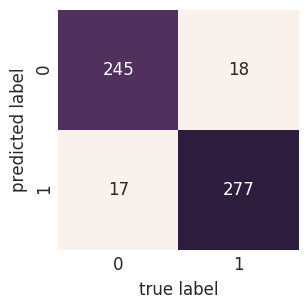

In [28]:
# Artificial Neural Networks
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(24,24,24))

#Standardizing the data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

#applying model
ann_model.fit(Xtrain, Ytrain)
pred = ann_model.predict(Xtest)

ann_mat = confusion_matrix(Ytest, pred)
sns.heatmap(ann_mat.T, square = True, annot = True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

accuracy_score(Ytest, pred)

In [29]:
ANN_val = cross_val_score(ann_model, Xtrain, Ytrain)
print(np.mean(ANN_val))

0.929989422875


# Model Accuracies with Percents Won in the Data

| Model  | Individual Accuracy  | Cross Validation   |
|---|---|---|
| Support Vector Machines  |  0.92459605026929981 |  0.942567729886 |
| Random Forests  |  0.91023339317773788 |  0.914292062723 |
| Random Forests with PCA  |  0.89946140035906641 | 0.911142913413  |
| K-means  | 0.49506283662477557  |   |
| Guassian Mixture Models | 0.5  |   |
| Guassian Naive Bayes  |  0.91202872531418311 |  0.885986168343 |
| Multinomial Naive Bayes  |  0.8671454219030521 |  0.8604353152 |
| Artificial Neural Networks  |  0.9425493716337523 | 0.942552481055  |

# Model Accuracies without Percents Won

| Model  | Individual Accuracy  | Cross Validation   |
|---|---|---|
| Support Vector Machines  | 0.73967684021543989  | 0.804796929377  |
| Random Forests  |  0.88150807899461403 | 0.860419209648  |
| Random Forests with PCA  | 0.74506283662477557  |  0.741462596886 |
| K-means  | 0.50628366247755829 |   |
| Guassian Mixture Models | 0.49910233393177739  |   |
| Guassian Naive Bayes  |  0.741472172352 | 0.756741643149  |
| Guassian Naive Bayes PCA |  0.7342908438061041 |  0.746409453977 |
| Multinomial Naive Bayes  |  0.76122082585278272 |  0.767938518275 |
| Artificial Neural Networks  |  0.93177737881508083 |  0.928795752225 |

## Reflection

I was honestly surprised to see that some of these models had relative success in testing the winners of matches based on the serving statistics. I was expecting more models to perform like the clustering methods that I had attempted. However, I do believe that neural networks would be the best models to employ with further expansions of this project. 

I would like to potentially continue with a project like this. However, I would like to add more data, that does not deal with the serve, to determine the winners. I feel like some of the inaccuracies came from a special case that is becoming more popular in modern tennis. With the advanced technology in tennis racquets and string. Players are starting to focus more on returning the serve and extending the rallies. These players usually focus more on groundstrokes and perform better on slower surfaces like clay. With this caveat in mind, I believe that adding returning data and maybe average error rate would allow us to enhance the model performance. 

These predictive models would lend themselves to coaches during matches. The WTA allows players to call a coach onto the court during a changeover, once per set. With this type of model, a coach would be able to access real-time match data for both players and help his or her player determine the best course for success when it comes to serving.

SAP is a partner of the WTA and provides match data to coaches and players after matches. Coaches also have live access to data. This does really help players start to perform better if they have knowledge of what is happening during the match.